# MiniProject 2: SVM for Classification
### How to run this notebook
- **Run all cells in order using _"Run All"_ in the Cell menu**
- If you wish to re-run a cell, you must re-run all cells in order after restarting the kernel

- In certain cases, if the output of a cell is too large, you can click the _"Open full output data in text editor"_ button to view it. 

- *If any cell returns an error, pressing restart and re-running all cells in order should fix it.*

### Introduction
Support vector machine is another simple algorithm that every machine learning expert should have in the arsenal. Support vector machine is highly preferred by many as it produces significant accuracy with less computation power. Support Vector Machine abbreviated as SVM can be used for both regression and classification tasks. But it is widely used in classification objectives. The objective of the support vector machine algorithm is to find a hyperplane in N-dimensional space
(N — the number of features) that distinctly classifies the data points. To separate the two classes of data points, many possible hyperplanes could be chosen. Our objective is to find a plane that has the maximum margin.



### Loading the dataset and libraries

In [1]:
# load wisconson breast cancer data

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
%matplotlib inline
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_blobs

cancer = load_breast_cancer()
print(cancer['DESCR'])
import warnings 

## Avoid printing out warnings
with warnings.catch_warnings():
     warnings.filterwarnings("ignore")
     X, y = load_breast_cancer(return_X_y=True)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

### Preparing the data
#### Normalizing, Scaling, and Splitting 

In [2]:
y[y==0] = -1
y = y.reshape(-1,1)

In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

### Computing the SVM

In [4]:
def gradient(X, y, w, C): 
    distance = 1 - (y * np.dot(X, w)) 
    dw = np.zeros_like(w) 
    for ind, d in enumerate(distance):
        if max(0, d) == 0:
            di = w
        else:
            di = w - (C * y[ind] * X[ind]).reshape(-1,1)
        dw += di
    dw = dw/len(X) # average
    return dw

def learning_schedule(t, t0, t1):
    return t0 / (t + t1)

def mini_batch_gradient_descent(X, y, w, C, n_epochs, batch_size, t0, t1):
    m = len(X)
    cost_history = np.zeros(n_epochs)
    for epoch in range(n_epochs):
        shuffled_indices = np.random.permutation(m)
        X_shuffled = X[shuffled_indices]
        y_shuffled = y[shuffled_indices]
        for i in range(0, m, batch_size):
            xi = X_shuffled[i:i+batch_size]
            yi = y_shuffled[i:i+batch_size]
            eta = learning_schedule(epoch * m + i, t0, t1)
            gradients = gradient(xi, yi, w, C)
            w = w - eta * gradients
        cost_history[epoch] = 0.5 * np.dot(w.T, w) + C * np.sum(np.maximum(0, 1 - y * np.dot(X, w)))
    return w, cost_history

def svm(X, y, C, n_epochs, batch_size, t0, t1):
    # initialize w with zeros
    w = np.zeros((X.shape[1], 1))
    w, cost_history = mini_batch_gradient_descent(X, y, w, C, n_epochs, batch_size, t0, t1)
    return w, cost_history

[[-0.1173098 ]
 [-0.07441123]
 [-0.11766548]
 [-0.11724024]
 [-0.04384117]
 [-0.05721033]
 [-0.10198827]
 [-0.1284647 ]
 [-0.03258953]
 [ 0.03612621]
 [-0.10869407]
 [-0.00431107]
 [-0.09553509]
 [-0.10107794]
 [ 0.00298843]
 [ 0.01656423]
 [ 0.0198365 ]
 [-0.01693729]
 [-0.00876063]
 [ 0.03115619]
 [-0.13860157]
 [-0.09952116]
 [-0.13350027]
 [-0.13313798]
 [-0.09186036]
 [-0.0678324 ]
 [-0.08920682]
 [-0.12647192]
 [-0.08920033]
 [-0.04289923]]


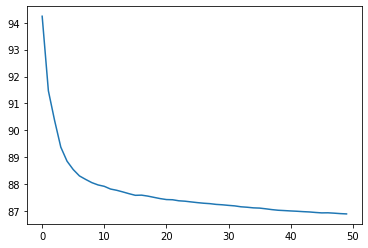

In [5]:

def predict(X, w):
    return np.sign(np.dot(X, w))

w, cost_history = svm(X_train, y_train, C=1, n_epochs=50, batch_size=20, t0=5, t1=50)
y_pred = predict(X_test, w)

plt.plot(cost_history)
print(w)

### Evaluating the model
- Accuracy
- Precision
- Recall
- F1 Score
- Confusion Matrix

In [6]:


print("Accuracy:", np.mean(y_pred == y_test))

print("Precision:", np.mean(y_pred[y_test==1] == y_test[y_test==1]))

print("Recall:", np.mean(y_pred[y_test==-1] == y_test[y_test==-1]))

print("F1 score:", 2 * np.mean(y_pred[y_test==1] == y_test[y_test==1]) * np.mean(y_pred[y_test==-1] == y_test[y_test==-1]) / (np.mean(y_pred[y_test==1] == y_test[y_test==1]) + np.mean(y_pred[y_test==-1] == y_test[y_test==-1])))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))



Accuracy: 0.9824561403508771
Precision: 0.9722222222222222
Recall: 1.0
F1 score: 0.9859154929577464
Confusion Matrix:
[[42  0]
 [ 2 70]]


### Closest point to the hyperplane (decision boundary)

In [7]:
def find_closest_point(X, y, w):
      distance = np.abs(y * np.dot(X, w))
      idx = np.argmin(distance)
      return X[idx]

closest_point = find_closest_point(X_train, y_train, w)
print("Closest point to hyperplane:", closest_point)


Closest point to hyperplane: [-0.19804075  0.07920208 -0.25245611 -0.25451619 -0.41847281 -0.78574699
 -0.37940264 -0.37502247 -0.77990952 -0.86298204  0.2328949  -0.12673814
  0.13659913  0.0673895  -0.346007   -0.82985564 -0.34429312 -0.38170158
 -0.64683754 -0.72885397  0.3542789   0.68276767  0.27816361  0.1986738
  0.33891307 -0.63400893 -0.03736543  0.02122248 -0.02710707 -0.56722618]


### Testing with Random Weights and different Splits

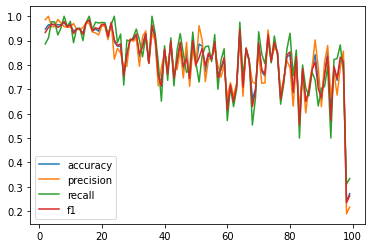

In [8]:
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
for i in range(2,100,1):
    w = np.random.randn(X.shape[1], 1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    w, cost_history = mini_batch_gradient_descent(X_train, y_train, w, C=1, n_epochs=50, batch_size=i, t0=5, t1=50)
    y_pred = predict(X_test, w)
    f1 = 2 * np.mean(y_pred[y_test==1] == y_test[y_test==1]) * np.mean(y_pred[y_test==-1] == y_test[y_test==-1]) / (np.mean(y_pred[y_test==1] == y_test[y_test==1]) + np.mean(y_pred[y_test==-1] == y_test[y_test==-1]))
    accuracy = np.mean(y_pred == y_test)
    precision = np.mean(y_pred[y_test==1] == y_test[y_test==1])
    recall = np.mean(y_pred[y_test==-1] == y_test[y_test==-1])
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)


# plot accuracy, precision, recall, f1 scores vs batch size 
plt.plot(range(2,100,1), accuracy_scores, label='accuracy')
plt.plot(range(2,100,1), precision_scores, label='precision')
plt.plot(range(2,100,1), recall_scores, label='recall')
plt.plot(range(2,100,1), f1_scores, label='f1')
plt.legend()
plt.show()



As the batch size gets larger and larger, there are large fluctuations in the evaluation metrics.

So, we can see that a low batch size for mini-batch stochastic gradient descent is better than a higher batch size, as it gives more stable results. 

### Testing the model on generated blobs

F1 score: 1.0


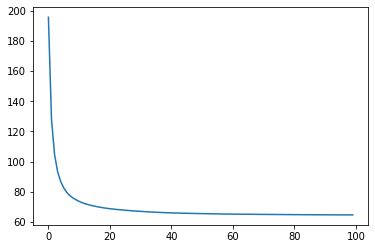

In [9]:

X, Y = make_blobs(n_samples=1000, centers=2, random_state=101)

Y[Y==0] = -1
Y = Y.reshape(-1,1)

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
w, cost_history = svm(X_train, y_train, C=1, n_epochs=100, batch_size=32, t0=5, t1=50)
y_pred = predict(X_test, w)

print("F1 score:", 2 * np.mean(y_pred[y_test==1] == y_test[y_test==1]) * np.mean(y_pred[y_test==-1] == y_test[y_test==-1]) / (np.mean(y_pred[y_test==1] == y_test[y_test==1]) + np.mean(y_pred[y_test==-1] == y_test[y_test==-1])))

plt.plot(cost_history)

